In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

# 데이터 경로 설정
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/UCI-HAR/UCI-HAR"
FEATURE_COLUMNS = [
    "mean_accel_z", "mean_accel_magnitude", "std_accel_magnitude", "var_accel_x", "var_accel_y", "var_accel_z",
    "mean_gyro_x", "mean_gyro_y", "mean_gyro_z", "std_gyro_x", "std_gyro_y", "std_gyro_z",
    "mean_total_acc_x", "mean_total_acc_y", "mean_total_acc_z",
    "std_total_acc_x", "std_total_acc_y", "std_total_acc_z",
    "var_total_acc_x", "var_total_acc_y", "var_total_acc_z",
    "rms_accel", "entropy_accel"
]

# 샘플링 주기 (50Hz) 및 슬라이딩 윈도우 설정
WINDOW_SIZE = 25  # 0.5초간 25개 샘플
STEP_SIZE = 25    # 겹침 없음

def extract_features(df, label):
    feature_list = []
    for start in range(0, len(df) - WINDOW_SIZE + 1, STEP_SIZE):
        window = df.iloc[start:start + WINDOW_SIZE]

        # 가속도계 특징 추출
        accel_x, accel_y, accel_z = window["accel_x"], window["accel_y"], window["accel_z"]
        accel_mag = np.sqrt(accel_x**2 + accel_y**2 + accel_z**2)

        mean_accel_z = np.mean(accel_z)
        mean_accel_mag = np.mean(accel_mag)
        std_accel_mag = np.std(accel_mag)
        var_accel_x = np.var(accel_x)
        var_accel_y = np.var(accel_y)
        var_accel_z = np.var(accel_z)

        # 자이로스코프 특징 추출
        gyro_x, gyro_y, gyro_z = window["gyro_x"], window["gyro_y"], window["gyro_z"]
        mean_gyro_x, mean_gyro_y, mean_gyro_z = np.mean(gyro_x), np.mean(gyro_y), np.mean(gyro_z)
        std_gyro_x, std_gyro_y, std_gyro_z = np.std(gyro_x), np.std(gyro_y), np.std(gyro_z)

        # Total Acceleration 특징 추출
        total_acc_x, total_acc_y, total_acc_z = window["total_acc_x"], window["total_acc_y"], window["total_acc_z"]
        mean_total_acc_x, mean_total_acc_y, mean_total_acc_z = np.mean(total_acc_x), np.mean(total_acc_y), np.mean(total_acc_z)
        std_total_acc_x, std_total_acc_y, std_total_acc_z = np.std(total_acc_x), np.std(total_acc_y), np.std(total_acc_z)
        var_total_acc_x, var_total_acc_y, var_total_acc_z = np.var(total_acc_x), np.var(total_acc_y), np.var(total_acc_z)

        # 이동성 및 변동성 피처
        rms_accel = np.sqrt(np.mean(accel_mag**2))
        entropy_accel = stats.entropy(np.abs(accel_mag) / np.sum(np.abs(accel_mag)))

        # 피처 리스트 저장
        features = [
            mean_accel_z, mean_accel_mag, std_accel_mag, var_accel_x, var_accel_y, var_accel_z,
            mean_gyro_x, mean_gyro_y, mean_gyro_z, std_gyro_x, std_gyro_y, std_gyro_z,
            mean_total_acc_x, mean_total_acc_y, mean_total_acc_z,
            std_total_acc_x, std_total_acc_y, std_total_acc_z,
            var_total_acc_x, var_total_acc_y, var_total_acc_z,
            rms_accel, entropy_accel
        ]

        feature_list.append(features + [label])

    return feature_list

# 데이터 로드 함수
def load_data():
    def read_file(filepath):
        return np.loadtxt(filepath)

    # 가속도계 데이터
    accel_x_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_acc_x_train.txt"))
    accel_y_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_acc_y_train.txt"))
    accel_z_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_acc_z_train.txt"))

    # 자이로스코프 데이터
    gyro_x_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_gyro_x_train.txt"))
    gyro_y_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_gyro_y_train.txt"))
    gyro_z_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_gyro_z_train.txt"))

    # 전체 가속도 (Total Acceleration) 데이터
    total_acc_x_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/total_acc_x_train.txt"))
    total_acc_y_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/total_acc_y_train.txt"))
    total_acc_z_train = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/total_acc_z_train.txt"))

    # 레이블 데이터
    labels_train = read_file(os.path.join(DATA_PATH, "train/y_train.txt")).astype(int)

    return accel_x_train, accel_y_train, accel_z_train, gyro_x_train, gyro_y_train, gyro_z_train, total_acc_x_train, total_acc_y_train, total_acc_z_train, labels_train

# 데이터 로드
accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, total_acc_x, total_acc_y, total_acc_z, labels = load_data()

# DataFrame 변환 및 피처 추출
all_features = []
for i in range(len(labels)):
    df = pd.DataFrame({
        "accel_x": accel_x[i], "accel_y": accel_y[i], "accel_z": accel_z[i],
        "gyro_x": gyro_x[i], "gyro_y": gyro_y[i], "gyro_z": gyro_z[i],
        "total_acc_x": total_acc_x[i], "total_acc_y": total_acc_y[i], "total_acc_z": total_acc_z[i]
    })
    all_features += extract_features(df, labels[i])

# 데이터프레임 생성
feature_df = pd.DataFrame(all_features, columns=FEATURE_COLUMNS + ["label"])

# STANDING, SITTING, LAYING 데이터만 필터링 (UCI HAR 레이블: 4=Sitting, 5=Standing, 6=Laying)
feature_df = feature_df[feature_df["label"].isin([4, 5, 6])]



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


509/509 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8225 - loss: 0.4173 - val_accuracy: 0.9400 - val_loss: 0.1702
Epoch 2/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9371 - loss: 0.1598 - val_accuracy: 0.9503 - val_loss: 0.1417
Epoch 3/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9429 - loss: 0.1463 - val_accuracy: 0.9511 - val_loss: 0.1327
Epoch 4/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9509 - loss: 0.1245 - val_accuracy: 0.9420 - val_loss: 0.1309
Epoch 5/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9504 - loss: 0.1189 - val_accuracy: 0.9575 - val_loss: 0.1187
Epoch 6/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9587 - loss: 0.1042 - val_accuracy: 0.9557 - val_loss: 0.1153
Epoch 7/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9627 - loss: 0.0935 - val_accuracy: 0.9567 - val_loss: 0.1140
Epoch 8/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9636 - loss: 0.0900 - val_accuracy: 0.9599 - val

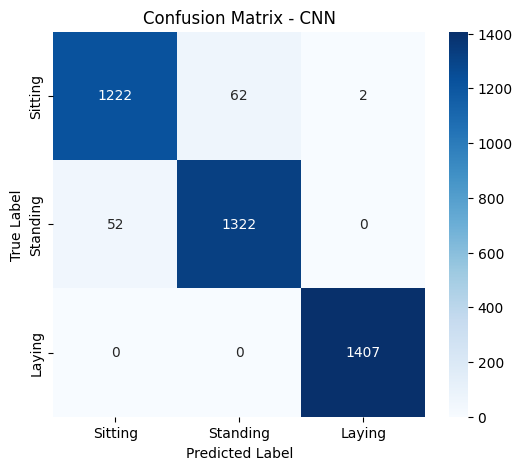

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
X = feature_df.drop(columns=["label"]).values
y = feature_df["label"].values

# 클래스 레이블 변경 (4 → 0, 5 → 1, 6 → 2)
y = np.where(y == 4, 0, np.where(y == 5, 1, 2))

# CNN을 위해 데이터 스케일링 (0~1 범위로 변환)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# CNN 입력 형태로 변환 (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # (샘플 수, 특징 개수, 채널 수)

# 훈련 데이터와 테스트 데이터 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# CNN 모델 정의
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation="relu"),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")  # 클래스 개수 = 3 (Sitting, Standing, Laying)
])

# 모델 컴파일
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 예측 수행
y_pred = np.argmax(model.predict(X_test), axis=1)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report 출력 (라벨을 0,1,2로 설정)
report = classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=["Sitting", "Standing", "Laying"])
print("\nClassification Report:\n", report)

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sitting", "Standing", "Laying"], yticklabels=["Sitting", "Standing", "Laying"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN")
plt.show()



Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.8282 - loss: 0.5047 - val_accuracy: 0.9115 - val_loss: 0.2533
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9156 - loss: 0.2700 - val_accuracy: 0.9361 - val_loss: 0.1928
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9209 - loss: 0.1963 - val_accuracy: 0.9337 - val_loss: 0.2261
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9271 - loss: 0.1859 - val_accuracy: 0.9349 - val_loss: 0.1645
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9351 - loss: 0.1590 - val_accuracy: 0.9410 - val_loss: 0.1901
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9388 - loss: 0.1665 - val_accuracy: 0.9386 - val_loss: 0.1638
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9398 - loss: 0.1491 - val_accuracy: 0.9361 - val_loss: 0.1570
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9443 - loss: 0.1384 - val_accuracy:

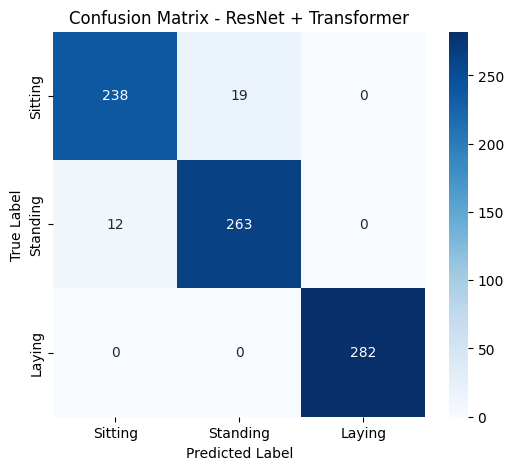

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, MaxPooling1D, Dense, Flatten, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 데이터 로드 함수
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/UCI-HAR/UCI-HAR"
VALID_CLASSES = [4, 5, 6]

def load_raw_data():
    def read_file(filepath):
        return np.loadtxt(filepath)

    # 가속도계 데이터
    accel_x = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_acc_x_train.txt"))
    accel_y = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_acc_y_train.txt"))
    accel_z = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_acc_z_train.txt"))

    # 자이로스코프 데이터
    gyro_x = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_gyro_x_train.txt"))
    gyro_y = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_gyro_y_train.txt"))
    gyro_z = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/body_gyro_z_train.txt"))

    # 전체 가속도 데이터
    total_acc_x = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/total_acc_x_train.txt"))
    total_acc_y = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/total_acc_y_train.txt"))
    total_acc_z = read_file(os.path.join(DATA_PATH, "train/Inertial Signals/total_acc_z_train.txt"))

    # 레이블 데이터
    labels = read_file(os.path.join(DATA_PATH, "train/y_train.txt")).astype(int)

    return accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, total_acc_x, total_acc_y, total_acc_z, labels

# 데이터 로드
accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, total_acc_x, total_acc_y, total_acc_z, labels = load_raw_data()

# STANDING, SITTING, LAYING만 필터링
valid_indices = np.isin(labels, VALID_CLASSES)
X = np.stack([accel_x[valid_indices], accel_y[valid_indices], accel_z[valid_indices],
              gyro_x[valid_indices], gyro_y[valid_indices], gyro_z[valid_indices],
              total_acc_x[valid_indices], total_acc_y[valid_indices], total_acc_z[valid_indices]], axis=-1)
y = labels[valid_indices]

# 클래스 변환 (4 → 0, 5 → 1, 6 → 2)
y = np.where(y == 4, 0, np.where(y == 5, 1, 2))

# 데이터 스케일링
scaler = StandardScaler()
X = np.reshape(X, (-1, X.shape[1] * X.shape[2]))  # 2D 변환
X = scaler.fit_transform(X)
X = np.reshape(X, (-1, X.shape[1] // 9, 9))  # 원래 형태로 복원

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TensorFlow ResNet 블록 정의
def resnet_block(inputs, filters):
    x = Conv1D(filters, kernel_size=3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv1D(filters, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)

    shortcut = Conv1D(filters, kernel_size=1, padding="same")(inputs)
    shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation("relu")(x)
    return x

# Transformer 블록 정의
def transformer_block(inputs, num_heads=4, ff_dim=128):
    x = LayerNormalization()(inputs)
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(x, x)
    x = Add()([x, attn_output])

    x = LayerNormalization()(x)
    ff_output = Dense(ff_dim, activation="relu")(x)
    ff_output = Dense(inputs.shape[-1])(ff_output)

    x = Add()([x, ff_output])
    return x

# ResNet + Transformer 모델 정의
def build_model(input_shape):
    inputs = Input(shape=input_shape)

    # ResNet Blocks
    x = resnet_block(inputs, 64)
    x = MaxPooling1D(pool_size=2)(x)
    x = resnet_block(x, 128)
    x = MaxPooling1D(pool_size=2)(x)

    # Transformer Encoder
    x = transformer_block(x)
    x = GlobalAveragePooling1D()(x)

    # Fully Connected Layers
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(3, activation="softmax")(x)  # 3개의 클래스

    model = Model(inputs, outputs)
    return model

# 모델 생성 및 컴파일
model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]))
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 예측 수행
y_pred = np.argmax(model.predict(X_test), axis=1)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report 출력
report = classification_report(y_test, y_pred, target_names=["Sitting", "Standing", "Laying"])
print("\nClassification Report:\n", report)

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sitting", "Standing", "Laying"], yticklabels=["Sitting", "Standing", "Laying"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - ResNet + Transformer")
plt.show()


In [ ]:
#------------------------ TEST ----------------------

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

WINDOW_SIZE = 128  # 윈도우 크기
STEP_SIZE = 64  # 윈도우 이동 크기

# 사용할 라벨 (앉기: 0, 눕기: 1, 서기: 2)
VALID_LABELS = {0, 1, 2}

WINDOW_SIZE = 128  # 윈도우 크기
STEP_SIZE = 64  # 윈도우 이동 크기

# 사용할 라벨 (앉기: 3, 눕기: 4, 서기: 5)
VALID_LABELS = {3, 4, 5}

def extract_features(data, labels):
    feature_list = []
    for i in range(data.shape[0]):  # 각 샘플별 반복
        sample = data[i]  # (128, 9) 형태의 샘플 데이터
        label = labels[i]

        if label not in VALID_LABELS:
            continue  # 유효한 라벨이 아닌 경우 건너뜀

        for start in range(0, sample.shape[0] - WINDOW_SIZE + 1, STEP_SIZE):
            window = sample[start:start + WINDOW_SIZE]

            # 가속도계 특징 추출
            accel_x, accel_y, accel_z = window[:, 0], window[:, 1], window[:, 2]
            accel_mag = np.sqrt(accel_x**2 + accel_y**2 + accel_z**2)

            mean_accel_z = np.mean(accel_z)
            mean_accel_mag = np.mean(accel_mag)
            std_accel_mag = np.std(accel_mag)
            var_accel_x = np.var(accel_x)
            var_accel_y = np.var(accel_y)
            var_accel_z = np.var(accel_z)

            # 자이로스코프 특징 추출
            gyro_x, gyro_y, gyro_z = window[:, 3], window[:, 4], window[:, 5]
            mean_gyro_x, mean_gyro_y, mean_gyro_z = np.mean(gyro_x), np.mean(gyro_y), np.mean(gyro_z)
            std_gyro_x, std_gyro_y, std_gyro_z = np.std(gyro_x), np.std(gyro_y), np.std(gyro_z)

            # Total Acceleration 특징 추출
            total_acc_x, total_acc_y, total_acc_z = window[:, 6], window[:, 7], window[:, 8]
            mean_total_acc_x, mean_total_acc_y, mean_total_acc_z = np.mean(total_acc_x), np.mean(total_acc_y), np.mean(total_acc_z)
            std_total_acc_x, std_total_acc_y, std_total_acc_z = np.std(total_acc_x), np.std(total_acc_y), np.std(total_acc_z)
            var_total_acc_x, var_total_acc_y, var_total_acc_z = np.var(total_acc_x), np.var(total_acc_y), np.var(total_acc_z)

            # 이동성 및 변동성 피처
            rms_accel = np.sqrt(np.mean(accel_mag**2))
            entropy_accel = stats.entropy(np.abs(accel_mag) / np.sum(np.abs(accel_mag)))

            # 피처 리스트 저장
            features = [
                mean_accel_z, mean_accel_mag, std_accel_mag, var_accel_x, var_accel_y, var_accel_z,
                mean_gyro_x, mean_gyro_y, mean_gyro_z, std_gyro_x, std_gyro_y, std_gyro_z,
                mean_total_acc_x, mean_total_acc_y, mean_total_acc_z,
                std_total_acc_x, std_total_acc_y, std_total_acc_z,
                var_total_acc_x, var_total_acc_y, var_total_acc_z,
                rms_accel, entropy_accel
            ]

            feature_list.append(features + [label])

    return np.array(feature_list)

# 데이터 로드
trainX, trainY, testX, testY = load_UCI_HAR()

# 특징 추출
train_features = extract_features(trainX, trainY)
test_features = extract_features(testX, testY)

# 데이터프레임 변환
columns = [
    "mean_accel_z", "mean_accel_mag", "std_accel_mag", "var_accel_x", "var_accel_y", "var_accel_z",
    "mean_gyro_x", "mean_gyro_y", "mean_gyro_z", "std_gyro_x", "std_gyro_y", "std_gyro_z",
    "mean_total_acc_x", "mean_total_acc_y", "mean_total_acc_z",
    "std_total_acc_x", "std_total_acc_y", "std_total_acc_z",
    "var_total_acc_x", "var_total_acc_y", "var_total_acc_z",
    "rms_accel", "entropy_accel", "label"
]

train_df = pd.DataFrame(train_features, columns=columns)
test_df = pd.DataFrame(test_features, columns=columns)


In [7]:
train_df.shape, test_df.shape

((4067, 24), (1560, 24))

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 라벨 컬럼 설정 (예: 'target'이 라벨 컬럼이라고 가정)
label_col = 'label'

# X와 y 분리
X_train2 = train_df.drop(columns=[label_col])
y_train = train_df[label_col]

X_test2 = test_df.drop(columns=[label_col])
y_test = test_df[label_col]

# 원-핫 인코딩 적용
encoder = OneHotEncoder(sparse_output=False)  # sparse=False -> sparse_output=False로 변경
y_train2 = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test2 = encoder.transform(y_test.values.reshape(-1, 1))

# 결과 출력 확인
print("X_train2 shape:", X_train2.shape)
print("y_train2 shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("y_test2 shape:", y_test2.shape)


X_train2 shape: (4067, 23)
y_train2 shape: (4067, 3)
X_test2 shape: (1560, 23)
y_test2 shape: (1560, 3)


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# ------------------------------
# 1. 데이터 로드 및 전처리 (Total Acc 포함)
# ------------------------------
def load_UCI_HAR():
    DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/UCI-HAR/UCI-HAR/"

    # 파일 로드 함수
    def load_file(filepath):
        return np.loadtxt(filepath, dtype=np.float32)

    def load_group(filenames, prefix=""):
        return np.dstack([load_file(prefix + name) for name in filenames])

    # 사용할 센서 데이터 (총 9채널)
    train_files = [
        "body_acc_x_train.txt", "body_acc_y_train.txt", "body_acc_z_train.txt",
        "body_gyro_x_train.txt", "body_gyro_y_train.txt", "body_gyro_z_train.txt",
        "total_acc_x_train.txt", "total_acc_y_train.txt", "total_acc_z_train.txt"
    ]
    test_files = [
        "body_acc_x_test.txt", "body_acc_y_test.txt", "body_acc_z_test.txt",
        "body_gyro_x_test.txt", "body_gyro_y_test.txt", "body_gyro_z_test.txt",
        "total_acc_x_test.txt", "total_acc_y_test.txt", "total_acc_z_test.txt"
    ]

    trainX = load_group(train_files, prefix=DATASET_PATH + "train/Inertial Signals/")
    testX = load_group(test_files, prefix=DATASET_PATH + "test/Inertial Signals/")

    # 라벨 로드
    trainY = load_file(DATASET_PATH + "train/y_train.txt") - 1  # 0부터 시작
    testY = load_file(DATASET_PATH + "test/y_test.txt") - 1

    return trainX, trainY, testX, testY

# 데이터 불러오기
trainX, trainY, testX, testY = load_UCI_HAR()

# ------------------------------
# 2. 앉기(3), 눕기(4), 서기(5)만 필터링
# ------------------------------
selected_classes = {3: 0, 4: 1, 5: 2}  # 3 → 0 (앉기), 4 → 1 (눕기), 5 → 2 (서기)

def filter_data(X, Y):
    mask = np.isin(Y, list(selected_classes.keys()))
    X_filtered = X[mask]
    Y_filtered = np.vectorize(selected_classes.get)(Y[mask])
    return X_filtered, Y_filtered

trainX, trainY = filter_data(trainX, trainY)
testX, testY = filter_data(testX, testY)

# ------------------------------
# 3. 데이터 정규화 및 원-핫 인코딩
# ------------------------------
scaler = StandardScaler()

trainX = np.reshape(trainX, (-1, trainX.shape[-1]))  # (samples * time_steps, channels)
testX = np.reshape(testX, (-1, testX.shape[-1]))

trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

trainX = trainX.reshape(-1, 128, 9)  # (샘플 수, 타임스텝, 센서 채널 9개)
testX = testX.reshape(-1, 128, 9)

num_classes = len(selected_classes)
trainY = keras.utils.to_categorical(trainY, num_classes)
testY = keras.utils.to_categorical(testY, num_classes)


In [10]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((4067, 128, 9), (1560, 128, 9), (4067, 3), (1560, 3))

In [11]:
import numpy as np


# 동일 여부 비교
train_equal = np.array_equal(y_train2, trainY)
test_equal = np.array_equal(y_test2, testY)

print(f"y_train2와 trainY가 동일한가? {train_equal}")
print(f"y_test2와 testY가 동일한가? {test_equal}")

# 값이 동일하지만 데이터 타입이 다를 경우를 고려
train_close = np.allclose(y_train2, trainY)
test_close = np.allclose(y_test2, testY)

print(f"y_train2와 trainY가 값이 비슷한가? {train_close}")
print(f"y_test2와 testY가 값이 비슷한가? {test_close}")


y_train2와 trainY가 동일한가? True
y_test2와 testY가 동일한가? True
y_train2와 trainY가 값이 비슷한가? True
y_test2와 testY가 값이 비슷한가? True


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ------------------------------
# ResNet 블록 정의
# ------------------------------
def resnet_block(inputs, filters, kernel_size=3, stride=1):
    x = layers.Conv1D(filters, kernel_size, strides=stride, padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters, kernel_size, strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)

    if inputs.shape[-1] != filters:
        inputs = layers.Conv1D(filters, 1, strides=stride, padding="same")(inputs)

    x = layers.Add()([x, inputs])
    x = layers.Activation("relu")(x)
    return x

# ------------------------------
# Transformer 블록 정의
# ------------------------------
def transformer_block(inputs, num_heads=2, ff_dim=128):
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attn_output = layers.LayerNormalization(epsilon=1e-6)(attn_output + inputs)

    ffn = keras.Sequential([
        layers.Dense(ff_dim, activation="relu"),
        layers.Dense(inputs.shape[-1])
    ])

    ffn_output = ffn(attn_output)
    ffn_output = layers.LayerNormalization(epsilon=1e-6)(ffn_output + attn_output)

    return ffn_output

# ------------------------------
# ResNet + Transformer 반복 적용 모델 정의
# ------------------------------
def build_resnet_transformer(input_shape, num_repeats=3):
    inputs = keras.Input(shape=input_shape)

    x = inputs
    for _ in range(num_repeats):  # ResNet + Transformer 반복 적용
        x = resnet_block(x, 64)
        x = transformer_block(x, num_heads=4, ff_dim=256)
        x = resnet_block(x, 128)
        x = transformer_block(x, num_heads=4, ff_dim=256)
        x = resnet_block(x, 256)

    x = layers.GlobalAveragePooling1D()(x)

    return keras.Model(inputs, x)

# ------------------------------
# 모델 구성
# ------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def resnet_block(inputs, filters, kernel_size=3, stride=1):
    x = layers.Conv1D(filters, kernel_size, strides=stride, padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters, kernel_size, strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)

    if inputs.shape[-1] != filters:
        inputs = layers.Conv1D(filters, 1, strides=stride, padding="same")(inputs)

    x = layers.Add()([x, inputs])
    x = layers.Activation("relu")(x)
    return x

def transformer_block(inputs, num_heads=2, ff_dim=128):
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attn_output = layers.LayerNormalization(epsilon=1e-6)(attn_output + inputs)

    ffn = keras.Sequential([
        layers.Dense(ff_dim, activation="relu"),
        layers.Dense(inputs.shape[-1])
    ])

    ffn_output = ffn(attn_output)
    ffn_output = layers.LayerNormalization(epsilon=1e-6)(ffn_output + attn_output)

    return ffn_output

def build_resnet_transformer(input_shape, num_repeats=3):
    inputs = keras.Input(shape=input_shape)

    x = inputs
    for _ in range(num_repeats):  # ResNet + Transformer 반복 적용
        x = resnet_block(x, 64)
        x = transformer_block(x, num_heads=4, ff_dim=256)
        x = resnet_block(x, 128)
        x = transformer_block(x, num_heads=4, ff_dim=256)
        x = resnet_block(x, 256)

    x = layers.GlobalAveragePooling1D()(x)

    return keras.Model(inputs, x)

def combined_model(shape1, shape2, num_classes):
    # Model 1: ResNet + Transformer 처리
    model1 = build_resnet_transformer(shape1)
    input1 = keras.Input(shape=shape1)
    output1 = model1(input1)

    # Model 2: ResNet + Transformer 처리
    model2 = build_resnet_transformer(shape2)
    input2 = keras.Input(shape=shape2)
    output2 = model2(input2)

    # 두 모델의 출력을 결합
    concatenated = layers.Concatenate()([output1, output2])

    # 최종 분류 레이어
    final_output = layers.Dense(num_classes, activation="softmax")(concatenated)

    model = keras.Model(inputs=[input1, input2], outputs=final_output)
    return model

# 예제 입력 형태
num_classes = 3  # 클래스 수 가정

# 모델 생성
model = combined_model((128, 9), (23, 1), num_classes)
model.summary()


# 예제 입력 형태
num_classes = 3  # 클래스 수 가정

# 모델 생성
model = combined_model((128, 9), (23, 1), num_classes)
model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 128, 9)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_15            │ (None, 23, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_6 (Functional) │ (None, 256)            │      4,091,456 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_13             │ (None, 256)            │      4,089,408 │ input_layer_15[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512)            │              0 │ functional_6[0][0],    │
│                           │                        │                │ functional_13[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 3)              │          1,539 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,182,403 (31.21 MB)

 Trainable params: 8,171,651 (31.17 MB)

 Non-trainable params: 10,752 (42.00 KB)

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 128, 9)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_31            │ (None, 23, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_21             │ (None, 256)            │      4,091,456 │ input_layer_23[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_28             │ (None, 256)            │      4,089,408 │ input_layer_31[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 512)            │              0 │ functional_21[0][0],   │
│ (Concatenate)             │                        │                │ functional_28[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_49 (Dense)          │ (None, 3)              │          1,539 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,182,403 (31.21 MB)

 Trainable params: 8,171,651 (31.17 MB)

 Non-trainable params: 10,752 (42.00 KB)

In [13]:
trainX.shape, trainY.shape

((4067, 128, 9), (4067, 3))

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(
    [trainX, X_train2], trainY,
    validation_split=0.1,
    epochs=5,
    batch_size=32
)


Epoch 1/5


In [ ]:

# ------------------------------
# 모델 평가
# ------------------------------
test_loss, test_acc = model.evaluate([testX, X_test2], testY)
print(f"테스트 정확도: {test_acc:.4f}")


In [129]:
# 모델 저장
model.save("my_model.h5")  # HDF5 파일로 저장


49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step
F1 Score: 0.4603


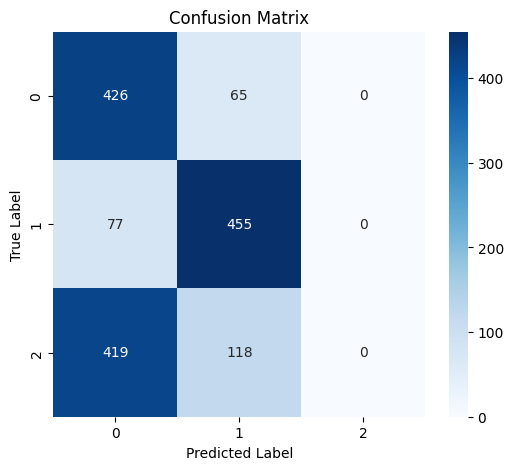

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

def evaluate_model_f1_cm(model, testX, X_test2, testY):
    # 모델 예측 수행
    predictions = model.predict([testX, X_test2])
    predicted_labels = np.argmax(predictions, axis=1)  # 가장 높은 확률의 클래스 선택
    true_labels = np.argmax(testY, axis=1)  # 실제 라벨 (one-hot을 index로 변환)

    # F1-score 계산
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix 계산
    cm = confusion_matrix(true_labels, predicted_labels)

    # Confusion Matrix 시각화
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    return f1

# 실행

f1 = evaluate_model_f1_cm(trained_model, testX, X_test2, testY)




In [127]:
testY.shape, X_test2.shape

((1560, 3), (1560, 23))

In [128]:
X_test2.columns

Index(['mean_accel_z', 'mean_accel_mag', 'std_accel_mag', 'var_accel_x',
       'var_accel_y', 'var_accel_z', 'mean_gyro_x', 'mean_gyro_y',
       'mean_gyro_z', 'std_gyro_x', 'std_gyro_y', 'std_gyro_z',
       'mean_total_acc_x', 'mean_total_acc_y', 'mean_total_acc_z',
       'std_total_acc_x', 'std_total_acc_y', 'std_total_acc_z',
       'var_total_acc_x', 'var_total_acc_y', 'var_total_acc_z', 'rms_accel',
       'entropy_accel'],
      dtype='object')